

  ### Importing the necessary libraries like numpy,pandas,matplotlib and printing the dataset info and its first 5      rows. Having a look at the dataset info is important as it gives us ideas about what a particular column of the    dataset holds and its datatype.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('dataset_task3.csv')

In [3]:
dataset.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

### Since after having a look at the output of dataset.head() we can confirm that the columns such as image,timestamp,url,pid and price are not important and the 2 columns which are important for our predicton are the description and product category tree so we keep these 2 columns for further study and prediction in our dataset.

In [5]:
dataset = dataset[['description', 'product_category_tree']]

In [6]:
dataset.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B..."
2,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >..."
3,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
4,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care..."


###  Since we have to predict the primary product category from the description we split the product category tree and only keep the primary category in the dataset for further model building and study. We split the product category tree from every '>>'meaning the first is the primary category . After splitting we add this variable d containing our primary product category into the dataset and drop the column of the product category tree , now we have only the description and the primary product category for further model building. 

In [7]:
dataset['product_category_tree'] = dataset.product_category_tree.apply(lambda x: x.replace('[', '').replace(']', '').replace('"',''))

In [8]:
d = dataset['product_category_tree'].apply(lambda x: x.split('>>'))

In [9]:
d = d.apply(lambda d: d[0])

In [10]:
dataset['primary_category'] = d

In [11]:
dataset.head()

,description,product_category_tree,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,"Clothing >> Women's Clothing >> Lingerie, Slee...",Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture >> Living Room Furniture >> Sofa Bed...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear >> Women's Footwear >> Ballerinas >> ...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,"Clothing >> Women's Clothing >> Lingerie, Slee...",Clothing
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies >> Grooming >> Skin & Coat Care >...,Pet Supplies


In [12]:
dataset = dataset.drop('product_category_tree', axis=1)

In [13]:
dataset.head()

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies


In [14]:
dataset.tail()

,description,primary_category
19995,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,Baby Care
19996,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Baby Care
19997,Buy Elite Collection Medium Acrylic Sticker fo...,Baby Care
19998,Buy Elite Collection Medium Acrylic Sticker fo...,Baby Care
19999,Buy Elite Collection Medium Acrylic Sticker fo...,Baby Care


### We now plot a graph to visualize data more clearly.In this graph plotted using matplotlib we find that that the most frequent primary category is Clothing owing upto 30% i.e 6000 from 20000 rows of data available.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

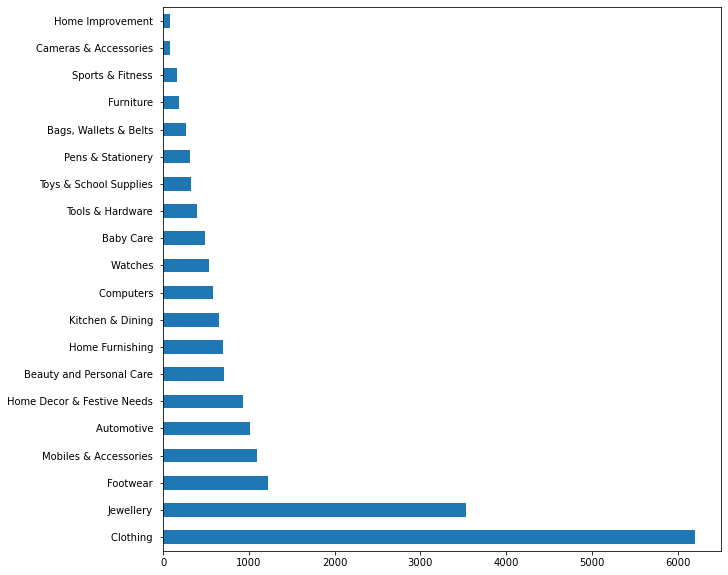

In [15]:
plt.figure(figsize=(10,10))
dataset['primary_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

In [16]:
dataset.head()

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies


###  Now, we import the regular expression library (re) module in python which provides regular expression matching operations. In the function below which takes a string as a parameter every character except alphabet is replaced and a cleaned string is returned with single space between all words. In next step of deep cleaning , we clean the description by removing stopwords.

In [17]:
import re
import nltk
def cleaning_string(str_arg):
    
    clean_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) 
    clean_str=re.sub('(\s+)',' ',clean_str) 
    clean_str=clean_str.lower() 
    
    return clean_str 


In [18]:
dataset['description'] = dataset['description'].astype('str').apply(cleaning_string)

In [19]:
dataset['description'].head()

0    key features of alisha solid women s cycling s...
1    fabhomedecor fabric double sofa bed finish col...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women s cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

In [20]:
dataset.tail()

,description,primary_category
19995,buy walldesign small vinyl sticker for rs onli...,Baby Care
19996,buy wallmantra large vinyl stickers sticker fo...,Baby Care
19997,buy elite collection medium acrylic sticker fo...,Baby Care
19998,buy elite collection medium acrylic sticker fo...,Baby Care
19999,buy elite collection medium acrylic sticker fo...,Baby Care


### In this step we will deep clean the texts. We will simplify the description column using the re library and nltk library and make an empty list called corpus which will be the main words on which our model will be trained. We will download the stopwords which consists of all the articles like the,a,an basically the words which have no use in our prediction. These stopwords will also not be included in the corpus.
###  Now we will import a Porter Stemmer class which will be useful to apply stemming to our descriptions.Stemming consists of taking only the root of the word to simplify the description and making the sparse matrix correct otherwise all the different forms of verb will have differnt columns making the sparse matrix complex.
### We will now make a for loop to iterate through all of our dataset description rows(20000 in our dataset) and clean them again by making all letters lowercase, removing punctuation and all the stopwords.This time we clean again the description along with the stopwords as stopwords cleaning was not done in the above cleaning_str function.Now we have the corpus cleaned on which our model will be fitted.

In [21]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 20000):
  desc = re.sub('[^a-zA-Z]', ' ', dataset['description'][i])
  desc = desc.lower()
  desc = desc.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  desc = [ps.stem(word) for word in desc if not word in set(all_stopwords)]
  desc = ' '.join(desc)
  corpus.append(desc)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sarth23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
dataset.head()

,description,primary_category
0,key features of alisha solid women s cycling s...,Clothing
1,fabhomedecor fabric double sofa bed finish col...,Furniture
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
4,specifications of sicons all purpose arnica do...,Pet Supplies


In [1]:
#corpus

### Now,we will create a bag of words .From feature_extraction module we will get to text sub module and call the CountVectorizer class . cv is instance of the CountVectorizer class which takes max_features as the only parameter. For example in our corpus there are words like Alisha,dilli etc which are not important and so we take only the most first 14000 important words (out of 15360 ).The taking of these words is upto us and we have to check taking how many would lead to best accuracy.Next we fit the X on the corpus which is the deep cleaned description and y on the primary category and then split into training and test set as 80-20 percent

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(max_features = 14000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [25]:
#len(X[0])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the naive based model on the training set and predicting test set results and making the confusion matrix.

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = classifier.predict(X_test)


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

0.86175

In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
classifier.score(X_test, y_test)

0.91375